# Predict Leaf Species

* Given a dataset of Grape leaf images, the task is to develop a machine learning model that can accurately classify Grapevine leaf 

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [19]:
data_path = r"C:\Users\user24\Desktop\Datasets\CNN\Grapevine_Leaves_Image_Dataset"

In [20]:
os.listdir(data_path)

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [21]:
label_name = os.listdir(data_path)   
len(label_name)

5

In [22]:
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)

In [23]:
for file in os.listdir(label_path):
    img_path = os.path.join(label_path, file)

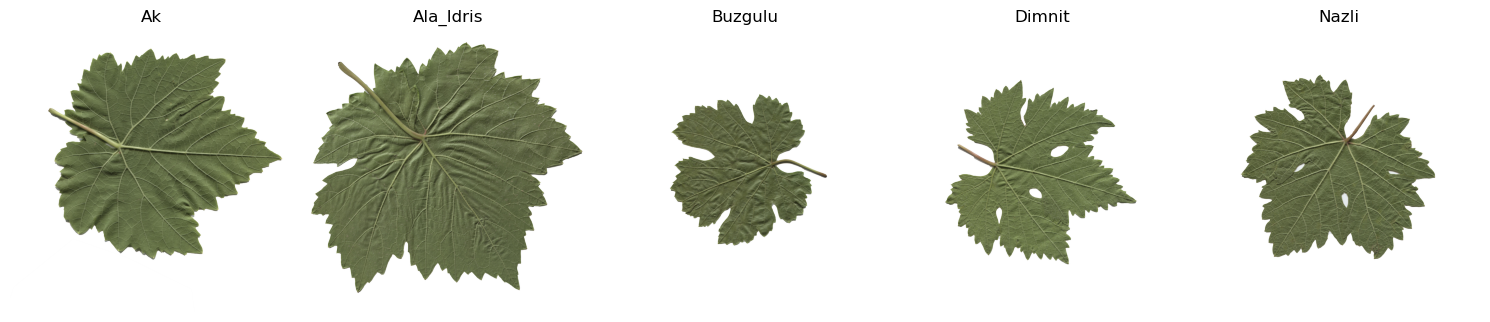

In [24]:
# Set up plot
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, class_name in enumerate(label_name):
    class_folder = os.path.join(data_path, class_name)
    image_name = random.choice(os.listdir(class_folder))  
    image_path = os.path.join(class_folder, image_name)
    
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")  
s
plt.tight_layout()
plt.show()

In [25]:
class_counts = {}

for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):  
        class_counts[class_name] = len(os.listdir(class_folder))

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
df

       Class  Image Count
0         Ak          100
1  Ala_Idris          100
2    Buzgulu          100
3     Dimnit          100
4      Nazli          100


In [29]:
IMG_SIZE = (50, 50)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,       
    rotation_range=10,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2  
)

In [30]:
# Load training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'training'   # automatically selects training images
)

Found 400 images belonging to 5 classes.


In [31]:
# Load validation data
val_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'validation'   # automatically selects validation images
)

Found 100 images belonging to 5 classes.


In [32]:
print(train_generator.class_indices) 

{'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
# Create a Sequential model
input_shape = (50, 50, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Train the model on the training data
history = model.fit(train_generator,epochs=100,validation_data=val_generator)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.2489 - loss: 1.8989 - val_accuracy: 0.1900 - val_loss: 1.6087
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.2330 - loss: 1.6060 - val_accuracy: 0.2100 - val_loss: 1.6072
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.2403 - loss: 1.6057 - val_accuracy: 0.2200 - val_loss: 1.6047
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.2582 - loss: 1.5976 - val_accuracy: 0.2400 - val_loss: 1.5973
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.2613 - loss: 1.5847 - val_accuracy: 0.2600 - val_loss: 1.5957
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.3189 - loss: 1.5720 - val_accuracy: 0.2900 - val_loss: 1.5863
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.2567 - loss: 1.5718 - val_accuracy: 0.2600 - val_loss: 1.5706
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.2910 - loss: 1.5538 - val_accu

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tqdm import tqdm

In [38]:
data_path = r"C:\Users\user24\Desktop\Datasets\CNN\Grapevine_Leaves_Image_Dataset"
augmented_data_path = r"C:\Users\user24\Desktop\Datasets\CNN\Augmented_Grapevine_Leaves"

In [39]:
# Create new directory to save augmented images
os.makedirs(augmented_data_path, exist_ok=True)

In [40]:
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Number of augmented images to generate per original image
augment_count_per_image = 5 

# Loop over each class
for class_name in os.listdir(data_path):
    class_input_path = os.path.join(data_path, class_name)
    class_output_path = os.path.join(augmented_data_path, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_files = os.listdir(class_input_path)


    # Loops through each image file in the folder image_files.
    # tqdm is used to create a progress bar in the terminal or notebook, showing how many images have been processed.
    # desc=f"Augmenting {class_name}" adds a label to the progress bar indicating which class is currently being augmented 
    # (useful when working with multiple folders/classes).
    for image_file in tqdm(image_files, desc=f"Augmenting {class_name}"):
        img_path = os.path.join(class_input_path, image_file)
        image = load_img(img_path)  # Load image
        x = img_to_array(image)     # Convert to array
        x = np.expand_dims(x, axis=0)  # Add batch dimension

        i = 0
        for batch in augmentor.flow(x, batch_size=1, save_to_dir=class_output_path,
                                    save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= augment_count_per_image:
                break  # Stop after creating N augmentations

Augmenting Nazli: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.01it/s]


In [41]:
data_path = r"C:\Users\user24\Desktop\Datasets\CNN\Augmented_Grapevine_Leaves"

In [42]:
os.listdir(data_path)

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [43]:
label_name = os.listdir(data_path) 

In [44]:
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)

In [45]:
for file in os.listdir(label_path):
    img_path = os.path.join(label_path, file)

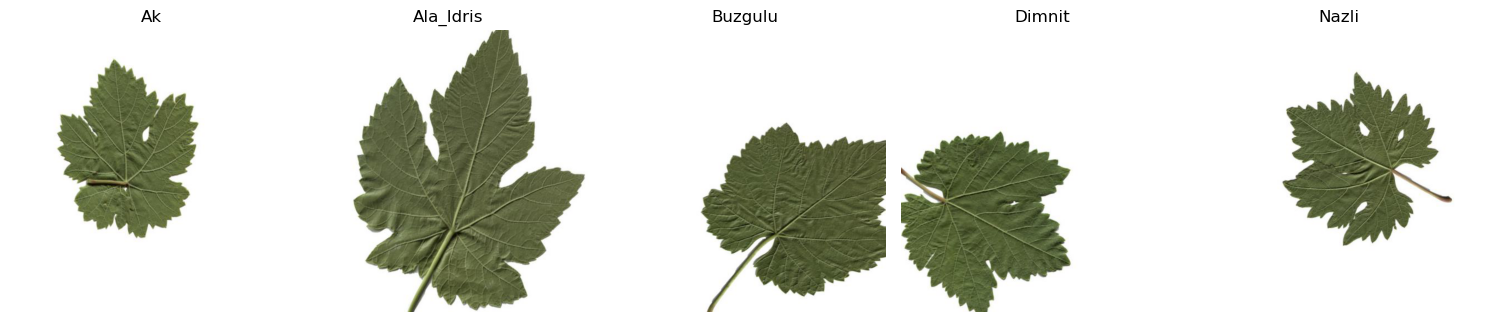

In [46]:
# Set up plot
fig, axes = plt.subplots(1, 5, figsize=(15, 5))


for i, class_name in enumerate(label_name):
    class_folder = os.path.join(data_path, class_name)
    image_name = random.choice(os.listdir(class_folder)) 
    image_path = os.path.join(class_folder, image_name)
    
    
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")  

# Show all images
plt.tight_layout()
plt.show()

In [47]:
# Dictionary to store counts
class_counts = {}

# Loop through each subfolder (class)
for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):  # Ensure it's a directory
        class_counts[class_name] = len(os.listdir(class_folder))

# Convert to DataFrame for better visualization
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
print(df)

       Class  Image Count
0         Ak          488
1  Ala_Idris          490
2    Buzgulu          489
3     Dimnit          487
4      Nazli          488


In [48]:
IMG_SIZE = (50, 50)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,      
    validation_split=0.2 
)

In [49]:
# Load training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'training'   # automatically selects training images
)

Found 1956 images belonging to 5 classes.


In [50]:
# Load validation data
val_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'validation'   # automatically selects validation images
)

Found 486 images belonging to 5 classes.


In [51]:
print(train_generator.class_indices) 

{'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [53]:
# Create a Sequential model
input_shape = (50, 50, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [54]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
# Train the model on the training data
history = model.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 394ms/step - accuracy: 0.2140 - loss: 1.6210 - val_accuracy: 0.2469 - val_loss: 1.6059
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.2228 - loss: 1.6020 - val_accuracy: 0.2078 - val_loss: 1.6103
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.2812 - loss: 1.5360 - val_accuracy: 0.2798 - val_loss: 1.5968
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.3226 - loss: 1.4779 - val_accuracy: 0.3786 - val_loss: 1.4157
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.4426 - loss: 1.3553 - val_accuracy: 0.3909 - val_loss: 1.3809
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.4908 - loss: 1.2424 - val_accuracy: 0.4177 - val_loss: 1.3443
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.5603 - loss: 1.1262 - val_accuracy: 0.4300 - val_loss: 1.2431
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.6457 - loss: 0.9326 - val_accuracy: 0

* model is overfitting.

    * Training accuracy = ~100%
    * Validation accuracy = ~49%  
    * That’s a clear sign your model has learned the training data too well but cannot generalize to new, unseen data.

In [56]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [57]:
# Load training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'training'   # automatically selects training images
)

Found 1956 images belonging to 5 classes.


In [58]:
# Load validation data
val_generator = datagen.flow_from_directory(
    data_path,
    target_size= IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode= 'categorical',
    subset = 'validation'   # automatically selects validation images
)

Found 486 images belonging to 5 classes.


In [62]:
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])


In [63]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# Train the model on the training data
history = model.fit(train_generator,epochs=50,validation_data=val_generator)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.5247 - loss: 1.1984 - val_accuracy: 0.4979 - val_loss: 1.1019
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.5407 - loss: 1.1142 - val_accuracy: 0.4835 - val_loss: 1.2067
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.5363 - loss: 1.1251 - val_accuracy: 0.5123 - val_loss: 1.2043
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.5702 - loss: 1.0518 - val_accuracy: 0.5082 - val_loss: 1.1145
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5960 - loss: 1.0249 - val_accuracy: 0.5494 - val_loss: 1.0382
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.6075 - loss: 0.9903 - val_accuracy: 0.5247 - val_loss: 1.2154
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5804 - loss: 1.0500 - val_accuracy: 0.5514 - val_loss: 1.0144
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.6410 - loss: 0.9315 - val_accu

In [66]:
class_labels = {0: 'Ak', 1: 'Ala_Idris', 2: 'Buzgulu', 3: 'Dimnit', 4: 'Nazli'}

In [67]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_leaf_species(img_path, model, class_labels, img_size=(64, 64)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (same as training)

    # Predict using the model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Show the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    return predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


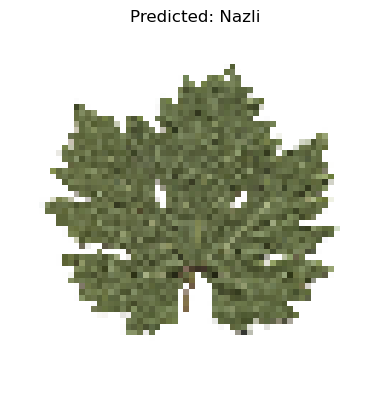

Predicted Leaf Species: Nazli


In [68]:
img_path = r"C:\Users\user24\Desktop\Datasets\CNN\Grapevine_Leaves_Image_Dataset\Nazli\Nazli (6).png"  # update path
result = predict_leaf_species(img_path, model, class_labels)
print("Predicted Leaf Species:", result)